<a href="https://colab.research.google.com/github/andiainundzariah/Skripsi/blob/master/Dataset5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan colab ke drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [11]:
pneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Pneumonia/')
print(pneumonia_data)
print(len(pneumonia_data))

tidakPneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia/')
print(tidakPneumonia_data)
print(len(tidakPneumonia_data))

['person63_bacteria_306.jpeg', 'person26_bacteria_122.jpeg', 'person69_bacteria_338.jpeg', 'person124_virus_238.jpeg', 'person60_bacteria_287.jpeg', 'person162_virus_319.jpeg', 'person74_bacteria_362.jpeg', 'person53_bacteria_254.jpeg', 'person55_bacteria_265.jpeg', 'person72_bacteria_353.jpeg', 'person51_bacteria_248.jpeg', 'person64_bacteria_316.jpeg', 'person253_bacteria_1156.jpeg', 'person97_virus_181.jpeg', 'person41_bacteria_206.jpeg', 'person255_bacteria_1188.jpeg', 'person24_bacteria_112.jpeg', 'person96_virus_179.jpeg', 'person256_bacteria_1189.jpeg', 'person125_virus_254.jpeg', 'person36_bacteria_183.jpeg', 'person38_bacteria_190.jpeg', 'person7_bacteria_25.jpeg', 'person66_bacteria_326.jpeg', 'person266_bacteria_1238.jpeg', 'person104_virus_191.jpeg', 'person41_bacteria_210.jpeg', 'person68_bacteria_335.jpeg', 'person88_virus_165.jpeg', 'person23_bacteria_102.jpeg', 'person39_bacteria_200.jpeg', 'person264_virus_547.jpeg', 'person124_virus_234.jpeg', 'person3_bacteria_12.jpe

NameError: ignored

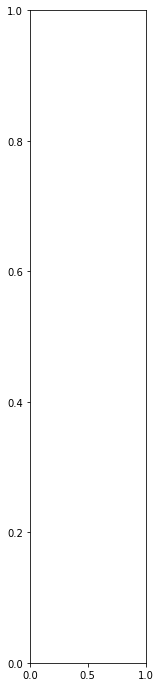

In [12]:
#Tahap ini hanya utk Visualisasi Citra Penyakit Pneumonia
#library matplotlib, hanya u/ visualisasi


plt.figure(figsize = (12,12)) #mengatur skala citra yg ditmpilkan
for i in range(5):            #melakukan perulangan sbnyk 5X (dgn nilai awal i=0)
    plt.subplot(1, 5, i+1)    #plot letak citra, librry cv2
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    plt.imshow(img,cmap='gray')           #plot citra sesuai ketmpt yg disediakan baris ke2
    plt.title('infected : 1') #pmbrian title, 1 itu memberikan nilai actual bahwa terinfeksi itu = 1
    plt.tight_layout()        #tampilannya disesuaikan dgn lebar layar

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_64F,1,0, ksize=0)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Sobel : x')
    plt.tight_layout()

plt.figure(figsize= (12,12))
for i in range (5):
  plt.subplot(1, 5, i+1)
  img = cv2.imread ('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" +pneumonia_data[i])
  edg


#Tahap Visualisasi Citra Tidak Pneumonia

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    edges = cv2.Canny(img, 80, 30)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])    #deklarasi var (x), isi datanya nnti sebagai header file .csv

#Proses Citra Malaria Terinfeksi
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Malaria TidakTerinfeksi
for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DatasetMalaria5050.csv", x, fmt='%s',delimiter=',' )

In [0]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DatasetMalaria5050.csv')
print (len(dataset))
print (dataset)

1000
           H1            H2            H3  ...            H6            H7  Actual
0    0.023395  1.397257e-05  4.961150e-08  ...  2.611034e-09  1.707388e-13     1.0
1    0.013967  4.756363e-06  1.822945e-08  ...  1.820996e-10  3.139236e-15     1.0
2    0.013096  3.963340e-06  5.858002e-08  ...  7.930139e-11 -9.146609e-16     1.0
3    0.019049  5.215492e-05  7.746225e-08  ...  1.265208e-09 -1.202414e-14     1.0
4    0.016204  8.703406e-07  4.471644e-07  ...  1.699768e-10 -3.232466e-14     1.0
..        ...           ...           ...  ...           ...           ...     ...
995  0.020236  3.033461e-05  8.205821e-07  ...  2.039957e-10 -6.929154e-15     0.0
996  0.016468  2.206734e-06  5.677155e-09  ... -4.457857e-11 -2.384089e-16     0.0
997  0.015833  2.184595e-05  1.025667e-07  ...  2.004346e-11 -1.120356e-16     0.0
998  0.017108  1.190947e-05  2.610560e-08  ...  9.565258e-11 -3.932178e-16     0.0
999  0.016640  8.068693e-06  2.609739e-09  ...  8.017982e-11  1.235930e-15     0.0

In [0]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X)
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.1)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x

900
100
900
100
1000


,H1,H2,H3,H4,H5,H6,H7
0,0.023395,1.397257e-05,4.961150e-08,9.735474e-07,1.289415e-13,2.611034e-09,1.707388e-13
1,0.013967,4.756363e-06,1.822945e-08,8.390509e-08,9.556587e-16,1.820996e-10,3.139236e-15
2,0.013096,3.963340e-06,5.858002e-08,3.987961e-08,1.696693e-15,7.930139e-11,-9.146609e-16
3,0.019049,5.215492e-05,7.746225e-08,2.312307e-07,-2.851514e-14,1.265208e-09,-1.202414e-14
4,0.016204,8.703406e-07,4.471644e-07,2.933913e-07,-1.012329e-13,1.699768e-10,-3.232466e-14
...,...,...,...,...,...,...,...
995,0.020236,3.033461e-05,8.205821e-07,4.060579e-08,-2.631824e-15,2.039957e-10,-6.929154e-15
996,0.016468,2.206734e-06,5.677155e-09,3.132966e-08,-3.431363e-16,-4.457857e-11,-2.384089e-16
997,0.015833,2.184595e-05,1.025667e-07,6.574165e-09,-1.288045e-16,2.004346e-11,-1.120356e-16
998,0.017108,1.190947e-05,2.610560e-08,4.063234e-08,1.263580e-15,9.565258e-11,-3.932178e-16


1.0    456
0.0    444
Name: Actual, dtype: int64
0.0    56
1.0    44
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

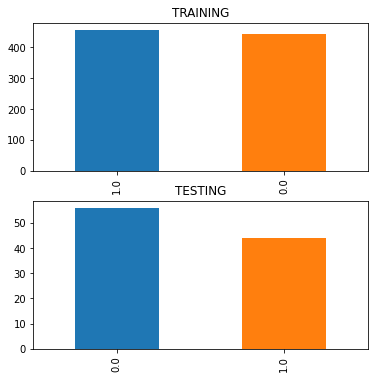

In [0]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(6,6)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [0]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[-0.64770106, -0.0854025 , -0.55617883, ...,  0.03695635,
        -0.31730072,  0.00617304],
       [-0.91304998, -0.49491882,  0.00967987, ...,  0.2833584 ,
         0.00692559,  0.39185601],
       [ 0.74887131, -0.59883401, -0.31365867, ...,  0.03325492,
        -0.30787656, -0.01811718],
       ...,
       [-1.238285  , -0.62701159, -0.55375738, ...,  0.03614081,
        -0.2965754 ,  0.00734555],
       [-0.61050511,  0.0890178 , -0.17107317, ...,  0.03586727,
        -0.26015753,  0.01269381],
       [-0.62951652, -0.5209628 , -0.5016798 , ...,  0.14306398,
        -0.16193497, -0.10784303]])

In [0]:
math.sqrt(len(y_test))

10.0

In [0]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.])

In [0]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred))
print("recall :" , recall_score(y_test, y_pred))
print("F-Measure :" , f1_score(y_test, y_pred))

[[47  9]
 [ 7 37]]
Akurasi : 0.84
presisi : 0.8043478260869565
recall : 0.8409090909090909
F-Measure : 0.8222222222222223


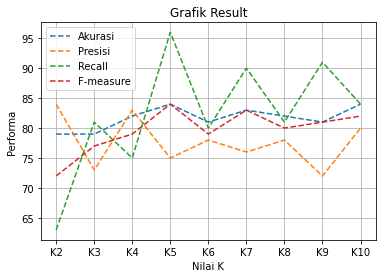

In [0]:
from matplotlib import pyplot as plt
x = ["K2", "K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [79, 79, 82, 84, 81, 83, 82, 81, 84]
p = [84, 73, 83, 75, 78, 76, 78, 72, 80]
r = [63, 81, 75, 96, 80, 90, 81, 91, 84]
f = [72, 77, 79, 84, 79, 83, 80, 81, 82]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("Grafik Result")
plt.xlabel("Nilai K")
plt.ylabel("Performa")
plt.legend(["Akurasi", "Presisi", "Recall", "F-measure"])
plt.grid()
plt.show()